In [1]:
# -*- coding: utf-8 -*-

## standard packages
import numpy as np
import os
import datetime
from importlib import reload

import configparser
import json

## Database
import sqlite3

import matplotlib.pyplot as plt

import sklearn

from collections import Counter

import src.utils as utils

In [2]:
#database.close()
database = utils.DataBase(os.getcwd() + "/src/DataBase/carStats.db")

In [3]:
database.connect()

In [4]:
cursor = database.getCursor()
adData = database.execute("""SELECT * FROM car""")

In [5]:
adData = np.array(adData)
adData.shape

(76972, 46)

In [6]:
adData[0]

array(['1.400 cm³', 'Escort Ghia 1.4 mit guten Verdeck!!!!!', 'weiß', None,
       'No Information', 'PETROL', 'Ford', '16.08.2017',
       'Keine Klimaanlage oder -automatik', 'Weiden',
       'weißes Escort Cabrio mit roten, guten Verdeck,innen Velour grau,5-Gang,Preis 600Euro ohne Tüv unaufbereitet wie steht\n*auch mobil erreichbar unter 0175-5356136\n*',
       2, 'Velours, Grau', 600.0, '9000', '2017-08-19', 'Car', 'True',
       'Benzin', 'Escort', 'Ford Escort', 'No Information', '02/1988',
       'EUR', 'No Information', 928, 2259203, 'No Information', 'USED',
       'DEALER', 'No Information', None, 'Cabrio / Roadster', '11',
       '130.000 km', 'No Information', None, 'No Information',
       'No Information', 'No Information', 92637, 1988, '54 kW (73 PS)',
       '2/3', 'DE', 'Schaltgetriebe'], dtype=object)

In [10]:
cursor = database.getCursor()
keys = []
for desc in cursor.description:
    keys.append(desc[0])
for i, v in enumerate(keys):
    print (i, v)
    print ("   ", adData[0][i])

0 cubiccapacity
    1.400 cm³
1 adspecificsmodeldescription
    Escort Ghia 1.4 mit guten Verdeck!!!!!
2 manufacturercolorname
    weiß
3 featurevariants
    None
4 consumption
    No Information
5 adspecificsfuel
    PETROL
6 adspecificsmake
    Ford
7 firstseen
    16.08.2017
8 climatisation
    Keine Klimaanlage oder -automatik
9 dealercity
    Weiden
10 description
    weißes Escort Cabrio mit roten, guten Verdeck,innen Velour grau,5-Gang,Preis 600Euro ohne Tüv unaufbereitet wie steht
*auch mobil erreichbar unter 0175-5356136
*
11 adfirstregmonth
    2
12 interior
    Velours, Grau
13 adprice
    600.0
14 adspecificsmakeid
    9000
15 lastseen
    2017-08-19
16 adsegment
    Car
17 isdealer
    True
18 fuel
    Benzin
19 adspecificsmodel
    Escort
20 adspecificsmakemodel
    Ford Escort
21 hu
    No Information
22 firstregistration
    02/1988
23 adcurrency
    EUR
24 parkassist
    No Information
25 adspecificshsn
    928
26 adid
    2259203
27 airbag
    No Information
28 adcond

In [105]:
sqlCommand = """SELECT adid, 
                adprice,
                
                adspecificsfuel,
                consumption,
                emission,
                cubiccapacity,
                power,
                mileage,
                
                adspecificsmake,
                adspecificsmodel,
                adspecificsmakeid,
                adspecificsmodelid,
                category,
                manufacturercolorname,
                
                dealerzip,
                
                firstseen,
                lastseen
                
                FROM car
                ORDER BY adid
                """

orderedData = database.execute(sqlCommand)


In [106]:
orderedData[0]

(2259203,
 600.0,
 'PETROL',
 'No Information',
 'No Information',
 '1.400 cm³',
 '54 kW (73 PS)',
 '130.000 km',
 'Ford',
 'Escort',
 '9000',
 '11',
 'Cabrio / Roadster',
 'weiß',
 92637,
 '16.08.2017',
 '2017-08-19')

In [107]:
cursor = database.getCursor()

In [114]:
keys = []
for i in cursor.description:
    keys.append(i[0])
    
for i, v in enumerate(keys):
    print(i, v)
len(keys)

0 adid
1 adprice
2 adspecificsfuel
3 consumption
4 emission
5 cubiccapacity
6 power
7 mileage
8 adspecificsmake
9 adspecificsmodel
10 adspecificsmakeid
11 adspecificsmodelid
12 category
13 manufacturercolorname
14 dealerzip
15 firstseen
16 lastseen


17

In [146]:
orderedArr = np.array(orderedData)

In [147]:

Counter(orderedArr[:, 2])

Counter({'HYBRID_DIESEL': 3,
         'PETROL': 47356,
         'OTHER': 35,
         None: 697,
         'CNG': 187,
         'HYDROGENIUM': 2,
         'DIESEL': 27651,
         'ELECTRICITY': 30,
         'HYBRID': 51,
         'LPG': 960})

In [148]:
for arr in orderedArr:
    
    if arr[2] and 'No Information' not in arr[2]:
        if 'PETROL' in arr[2]:
            arr[2] = 1
        elif 'DIESEL' in arr[2]:
            arr[2] = 2
        elif 'HYBRID_DIESEL' in arr[2]:
            arr[2] = 3
        elif 'CNG' in arr[2]:
            arr[2] = 4   
        elif 'HYDROGENIUM' in arr[2]:
            arr[2] = 5
        elif 'ELECTRICITY' in arr[2]:
            arr[2] = 6     
        elif 'HYBRID' in arr[2]:
            arr[2] = 7      
        elif 'LPG'in arr[2]:
            arr[2] = 8    
        elif 'OTHER' in arr[2]:
            arr[2] = 9   
        else: #None
            arr[2] = 10
    
    
    #consumption
    if arr[3] and 'No Information' not in arr[3] and 'l/100km' in arr[3]:
        try:
            arr[3] = float(arr[3][1:arr[3].find(' l/100km')].replace(',', '.'))
        except Exception as e:
            print (e)
            print (arr)
            break
    #elif arr[3] and 'No Information' not in arr[3]:
    #    arr[3] -> if cng or electricity
    else:
        arr[3] = None
    # emission
    if arr[4] and 'No Information' not in arr[4]:
        arr[4] = float(arr[4][1:arr[4].find(' g/km (kombiniert)')].replace(',', '.'))
    else:
        arr[4] = None
    #cubiccapacity
    if arr[5] and 'No Information' not in arr[5]:
        arr[5] = int(arr[5][:arr[5].find(' cm')].replace('.', ''))
    else:
        arr[5] = None
    #power
    if arr[6] and 'No Information' not in arr[6]:
        arr[6] = int(arr[6][:arr[6].find(' kW')].replace('.', ''))
    else:
        arr[6] = None
    #mileage
    if arr[7] and 'No Information' not in arr[7]:
        arr[7] = int(arr[7].replace('.', '')[:-3])
    else:
        arr[7] = None

In [149]:
arr

array([249143610, 10000.0, 1, None, None, 2793, 141, 155962, 'BMW', 'Z3',
       '3500', '51', 'Cabrio / Roadster', 'No Information', 50933,
       '19.08.2017', '2017-08-19'], dtype=object)

In [150]:
for i, k in enumerate(keys):
    print(i, k)
orderedArr[2]

0 adid
1 adprice
2 adspecificsfuel
3 consumption
4 emission
5 cubiccapacity
6 power
7 mileage
8 adspecificsmake
9 adspecificsmodel
10 adspecificsmakeid
11 adspecificsmodelid
12 category
13 manufacturercolorname
14 dealerzip
15 firstseen
16 lastseen


array([3489495, 4700.0, 1, 9.7, 229.0, 2000, 98, 34000, 'Chrysler',
       'Voyager', '5700', '21', 'Van / Minibus', 'grün', 92637,
       '16.08.2017', '2017-08-19'], dtype=object)

In [153]:
Counter(orderedArr[:, 2])

Counter({1: 47356,
         2: 27654,
         4: 187,
         5: 2,
         6: 30,
         None: 697,
         8: 960,
         9: 35,
         7: 51})

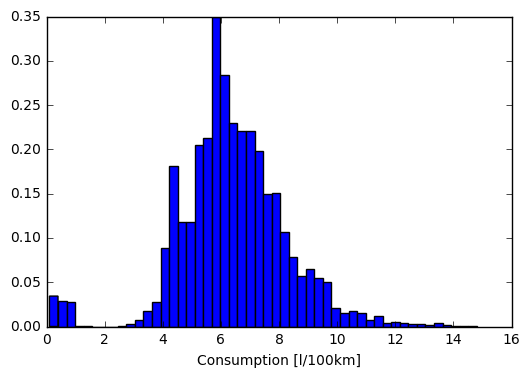

In [154]:
consumption = []

for arr in orderedArr:
    if arr[3]:
        consumption.append(arr[3]) # remove NoneTypes
consumption.sort()
consumption = consumption[:-100] # remove extreme outliers

plt.hist(consumption, bins=50, normed=True)
plt.xlabel('Consumption [l/100km]')
plt.show()

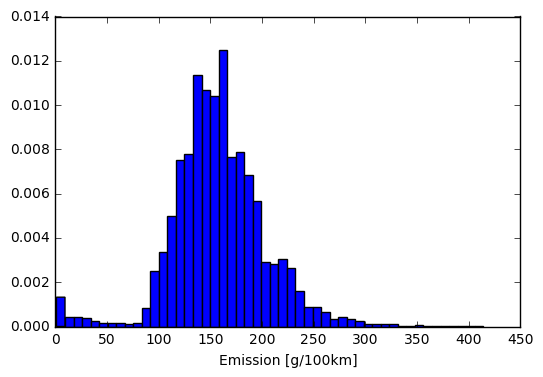

In [155]:
emission = []

for arr in orderedArr:
    if arr[4]:
        emission.append(arr[4]) # remove NoneTypes
emission.sort()
emission = emission[:-30] # remove extreme outliers

plt.hist(emission, bins=50, normed=True)
plt.xlabel('Emission [g/100km]')
plt.show()

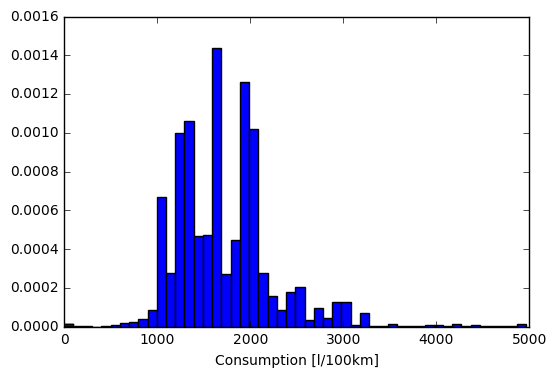

In [156]:
cubiccapacity = []

for arr in orderedArr:
    if arr[5]:
        cubiccapacity.append(arr[5]) # remove NoneTypes
cubiccapacity.sort()
cubiccapacity = cubiccapacity[:-100] # remove extreme outliers

plt.hist(cubiccapacity, bins=50, normed=True)
plt.xlabel('Consumption [l/100km]')
plt.show()

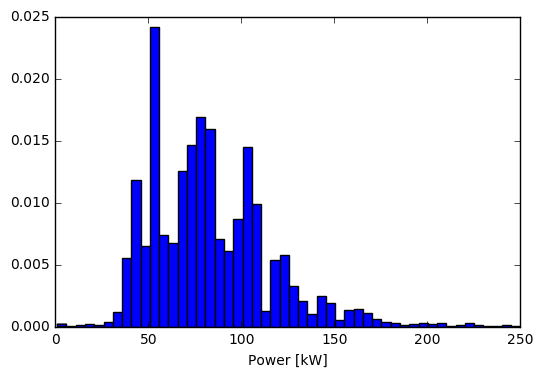

In [157]:
power = []

for arr in orderedArr:
    if arr[6]:
        power.append(arr[6]) # remove NoneTypes
power.sort()
power = power[:-100] # remove extreme outliers

plt.hist(power, bins=50, normed=True)
plt.xlabel('Power [kW]')
plt.show()

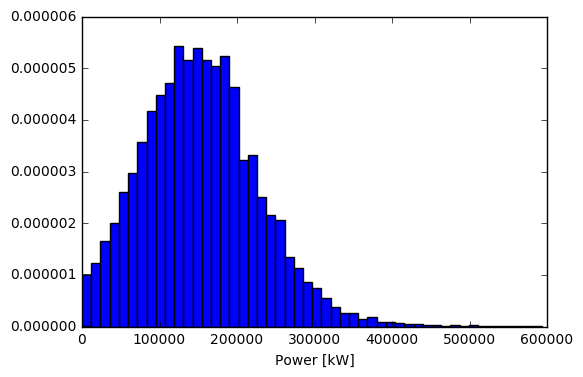

In [158]:
mileage = []

for arr in orderedArr:
    if arr[7]:
        mileage.append(arr[7]) # remove NoneTypes
mileage.sort()
mileage = mileage[:-100] # remove extreme outliers

plt.hist(mileage, bins=50, normed=True)
plt.xlabel('Power [kW]')
plt.show()

Now let's do some real stuff

- first, get all the data that can actually be trenslated into numerical data, or is already

- then, normalize and preprocess it if necessary

- now, we could do something like a PCA

In [160]:
for i, v in enumerate(keys):
    print(i, v)

0 adid
1 adprice
2 adspecificsfuel
3 consumption
4 emission
5 cubiccapacity
6 power
7 mileage
8 adspecificsmake
9 adspecificsmodel
10 adspecificsmakeid
11 adspecificsmodelid
12 category
13 manufacturercolorname
14 dealerzip
15 firstseen
16 lastseen


In [186]:
orderedNumericalData = orderedArr[:, [0, 1, 2, 3, 4, 5, 6, 7, 10, 11]]
orderedNumericalData.shape

(76972, 10)

In [228]:
noNones = []# remove rows with missing data

for i in orderedNumericalData:
    noEmpty = True
    for j in i:
        if not j:
            noEmpty = False
    if noEmpty:
        noNones.append(i)
noNones = np.array(noNones)
orderedNumericalData.shape, noNones.shape

((76972, 10), (49186, 10))

In [229]:
noNones, orderedNumericalData

(array([[3489495, 4700.0, 1, ..., 34000, '5700', '21'],
        [145786425, 5396.0, 2, ..., 179874, '12600', '2'],
        [164952535, 7950.0, 2, ..., 157631, '9000', '42'],
        ..., 
        [249143225, 10000.0, 1, ..., 27713, '19000', '5'],
        [249143391, 9600.0, 1, ..., 111111, '16800', '6'],
        [249143402, 9950.0, 2, ..., 136000, '25200', '26']], dtype=object),
 array([[2259203, 600.0, 1, ..., 130000, '9000', '11'],
        [2444899, 600.0, 1, ..., 158000, '19000', '5'],
        [3489495, 4700.0, 1, ..., 34000, '5700', '21'],
        ..., 
        [249143402, 9950.0, 2, ..., 136000, '25200', '26'],
        [249143428, 9990.0, 2, ..., 59837, '20700', '6'],
        [249143610, 10000.0, 1, ..., 155962, '3500', '51']], dtype=object))

In [238]:
normalized = np.zeros_like(noNones)

for i in range(noNones.shape[1]):
    col = noNones[:, i].astype(float)
    
    normalized[:, i] = (col-np.min(col))/(np.max(col) - np.min(col))



In [239]:
from sklearn.decomposition import PCA

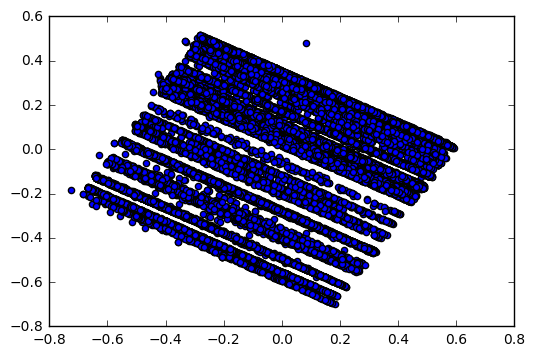

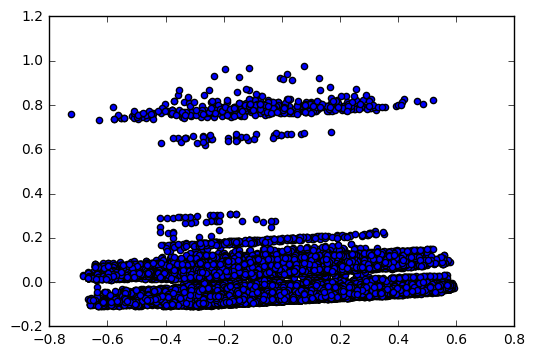

In [249]:
pca = PCA(n_components = 10)

scores = pca.fit_transform(normalized)

plt.scatter(scores[:, 0], scores[:, 1])
plt.show()

plt.scatter(scores[:, 0], scores[:, 2])
plt.show()

In [257]:
for i in pca.explained_variance_ratio_:
    print ("%2.2f" %i)

0.46
0.43
0.06
0.04
0.00
0.00
0.00
0.00
0.00
0.00


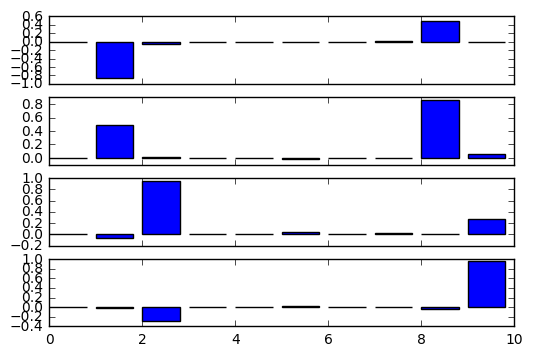

In [248]:
f, ax = plt.subplots(nrows=4, sharex=True)
for i, ai in enumerate(ax):
    ai.bar(range(10), pca.components_[i])
plt.show()

In [253]:
for i, v in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 10, 11]):
    print (i, v, keys[v])

0 0 adid
1 1 adprice
2 2 adspecificsfuel
3 3 consumption
4 4 emission
5 5 cubiccapacity
6 6 power
7 7 mileage
8 10 adspecificsmakeid
9 11 adspecificsmodelid


-> Model and Make correllate most with the price!